In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
# Sequential按顺序构成的模型
from keras.models import Sequential
# Dense全连接层
from keras.layers import Dense, Activation
# 优化器：随机梯度下降
from keras.optimizers import SGD

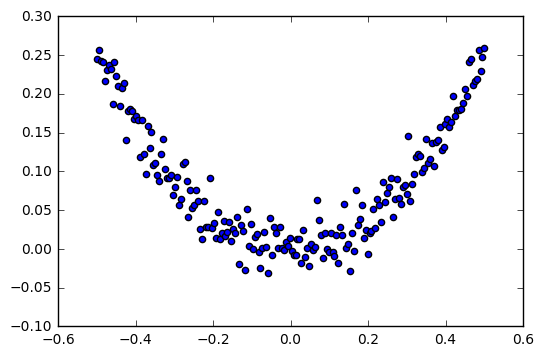

In [3]:
# 生成非线性数据模型
x_data = np.linspace(-0.5,0.5,200)
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

# 显示随机点
plt.scatter(x_data, y_data)
plt.show()

cost:  0.11566254
cost:  0.0059284647
cost:  0.005420627
cost:  0.0039270753
cost:  0.0012707997
cost:  0.0023045745
cost:  0.00043227203
W： [[-0.8097365   0.873398    0.46838143  0.16048421  0.23931012  0.37379673
   1.6485813   0.02880438  0.05999178  0.2506774 ]]  b:  [-0.3891211  -0.27747348 -0.0352951   0.1672752   0.04472595  0.08710503
  0.730751    0.21009925 -0.1056181   0.17212172]
4


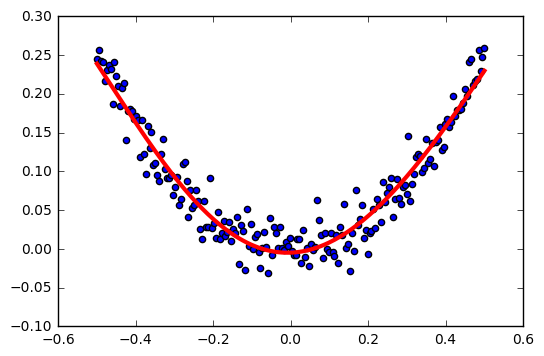

In [10]:
# # 构建一个顺序模型
model = Sequential()

# 在模型中添加一个全连接层
# 神经网络：1-10-1 

# 激活函数加法1
model.add(Dense(units=10, input_dim=1))
model.add(Activation('tanh'))
model.add(Dense(units=1))
model.add(Activation('tanh'))

# 激活函数加法2
# model.add(Dense(units=10, input_dim=1, activation='relu'))
# model.add(Dense(units=1, activation='relu'))

# 定义优化算法
sgd = SGD(lr=0.3)
# sgd: Stochastic gradient descent,随机梯度下降法
# mse: Mean Squared Error, 均方误差
model.compile(optimizer=sgd, loss='mse')

# 进行训练
for step in range(3001):
    # 每次训练一个批次
    cost = model.train_on_batch(x_data, y_data)
    # 每500个batch打印一次cost值
    if step % 500 == 0:
        print('cost: ', cost)
        
# 打印权值和偏置值
W, b = model.layers[0].get_weights()
print('W：', W, ' b: ', b)
print(len(model.layers))

# 把x_data输入网络中，得到预测值y_pred
y_pred = model.predict(x_data)

# 显示随机点
plt.scatter(x_data, y_data)
# 显示预测结果
plt.plot(x_data, y_pred, 'r-', lw=3)
plt.show()